In [63]:
### TO-DOs ###

# Store the intrinsic value output of the simulation to then allow for analysis of it
# Code a Monte Carlo simulation where each of the inputs is a distribution and the intrinsic index level is one too
# Plot the historical and projected trajectory with confidence intervals for each input
# Substitute each of hard-coded inputs for adequate cualculations
# Prepare this to be repeated at any point during the year and not just at year end (ttm calculations, etc.)

In [1]:
import requests
from urllib.parse import urlparse, urlunparse

import numpy as np
import numpy_financial as npf

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import yfinance as yf

from datetime import date


#financialmodellingprep.com API key
apikey = '6d5a44e82d49d8446e8db1914d12e2b4'
simfinkey = 'S54dNEScw70KAegQwNs46skHPfblWSoB'

In [13]:
valuation_date = date.fromisoformat('2020-06-01')
years_to_project = 5

projected_years = [y for y in range(valuation_date.year,valuation_date.year+years_to_project)]
# Instead of years the dates should be 12 months from valuation date, and then 12 months later, etc.

## S&P500 Valuation
21 February 2021

#### Framework and key questions to answer
<img src="img/IndexValueFramework.jpg" width=360 align="left"/>

#### Story

---

**1. Earnings Growth**

**2. Cash Return**

**3. Risk Premium**

**4. Risk Free Rate**

In [21]:
hist_df = pd.read_excel('data/histimplERP.xls',sheet_name='Historical Impl Premiums',header=6,skipfooter=7)
hist_df.drop(hist_df.tail(1).index,inplace=True) #Temporary fix because using data file from 2021 and replicating valuation as if it was 2020

In [57]:
output_df = pd.DataFrame()
output_df['year'] = hist_df['Year']
output_df['ERP'] = hist_df['Implied Premium (FCFE)']
output_df['earnings'] = hist_df['Earnings*']
output_df['RFR'] = hist_df['T.Bond Rate']
output_df['div&bb'] = hist_df['Dividends + Buybacks']

# Keep adding historical values for all the other elements of the valuation

### Present the historical and projected for each input with the rational for projection

In [190]:
#cash_returned = np.array([0,90.71,121.01,137.93,156.66,177.37])

### Calculations

In [59]:
# What is below would be one iteration

# Estimates for all inputs - Need to intriduce randomness here -
future_earnings = np.array([120,150,160.83,172.45,184.91])
cash_returned = np.array([0,90.71,121.01,137.93,156.66])
equity_risk_premium = 5.58/100
risk_free_rate = 0.66/100

discount_rate = risk_free_rate + 1 * equity_risk_premium
long_term_growth = risk_free_rate

#Calculate intrinsic value of the index given estimates for input
#cash_flows = np.copy(cash_returned)
#cash_terminal = cash_returned[-1]*(1+long_term_growth)/(discount_rate - long_term_growth)
#cash_flows[-1] += cash_terminal

#intrinsic_index_level = npf.npv(discount_rate,cash_flows)
### NEED TO DECIDE HOW TO STORE THE RESULT SO THE DISTRIBUTION OF VALUES CAN BE ANALYSED, ETC ###

# Create rows for projection
d = {'year': projected_years, 
     'earnings': future_earnings,
     'div&bb': cash_returned,
     'RFR': [risk_free_rate]*years_to_project,
     'ERP': [equity_risk_premium]*years_to_project,
    }

temp_df = pd.DataFrame(d)

# Append new projection to output_df
output_df = pd.concat([output_df,temp_df])

### OUT

<AxesSubplot:>

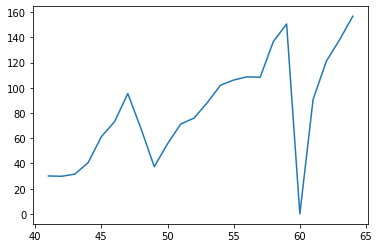

In [60]:
output_df.reset_index()['div&bb'].plot()